In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset as train, test features and labels
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

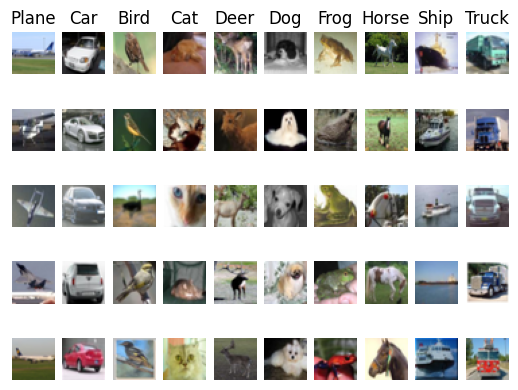

In [ ]:
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
num_classes = len(classes)
samples_per_class = 5

for j, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == j)
    idxs = np.random.choice(idxs, samples_per_class)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + j + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
# Reduce pixel values
X_train_s = X_train / 255.0
X_test_s = X_test / 255.0

In [ ]:
# flatten the label values
y_train_s, y_test_s = y_train.flatten(), y_test.flatten()

In [ ]:
nsamples, nx, ny, nz = X_train_s.shape
d2_train_dataset = X_train_s.reshape((nsamples,nx*ny*nz))
nsampless, nxx, nyy, nzz = X_test_s.shape
d2_test_dataset = X_test_s.reshape((nsampless,nxx*nyy*nzz))

In [ ]:
# Run your SVM experiments here.
from sklearn import svm

In [ ]:
Accurs_svm = []
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
for c in Cs:
    lin_clf = svm.LinearSVC(multi_class='ovr', dual = False, C = c)
    lin_clf.fit(d2_train_dataset, np.ravel(y_train_s,order='C'))
    pre_svm = lin_clf.predict(d2_test_dataset)
    accr_svm = lin_clf.score(d2_test_dataset, np.ravel(y_test_s,order='C'))
    Accurs_svm.append(accr_svm)
    print('At C= ', c)
    print("Accuracy =", accr_svm)

At C=  0.0001
Accuracy = 0.4025
At C=  0.001
Accuracy = 0.4095
At C=  0.01
Accuracy = 0.399
At C=  0.1
Accuracy = 0.3889
At C=  1
Accuracy = 0.3756


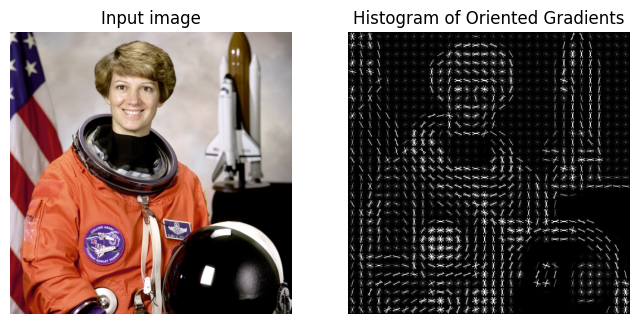

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
fd.shape

(8192,)

In [ ]:
image.shape

(512, 512, 3)

In [ ]:
512*512*3

786432

In [ ]:
def preprocess(xs):
  hog_imgs = []
  for x in xs:
    gray = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) / 255.0
    fd = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2))
    hog_imgs.append(fd)
  return np.array(hog_imgs)

In [ ]:
import cv2

In [ ]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(2)
pca.fit(X_train)
print(pca.n_components_)

2


In [ ]:
X_train.shape

(50000, 324)

In [ ]:
pca = PCA(0.8)
pca.fit(X_train)
print(pca.n_components_)

66


In [ ]:
#FLOAT POINT:  select the number of components such that the amount of variance that needs to be explained is greater
#than the percentage specified by n_components.
#First N Components whose sum together go at least 80% of Variance
#pca = PCA(0.8)
#pca.fit(X_train.reshape((50000,-1)))
#print(pca.n_components_)

In [ ]:
pipe = Pipeline([('standardScaler', StandardScaler()),("PCA",PCA(0.8)),('RBFSVC',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardScaler', StandardScaler()),
                ('PCA', PCA(n_components=0.8)), ('RBFSVC', SVC(C=10))])

In [ ]:
pipe.score(X_test,y_test)

0.6199

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
def preprocess(xs):
    hog_imgs = []
    for x in tqdm(xs):
        gray = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) / 255
        fd = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                    	cells_per_block=(2, 2))
        hog_imgs.append(fd)
    return np.array(hog_imgs)

In [ ]:
from tqdm import tqdm
import cv2
X_train = preprocess(X_train)
X_test = preprocess(X_test)

100%|██████████| 10000/10000 [00:05<00:00, 1702.61it/s]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(0.8)
pca.fit(X_train)
print(pca.n_components_)

66


In [ ]:
pipe = Pipeline([('standardscaler', StandardScaler()), ('rbfsvc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('rbfsvc', SVC(C=10))])

In [ ]:
pipe.score(X_test, y_test)

0.6348

In [ ]:
y_pred = pipe.predict(X_test)

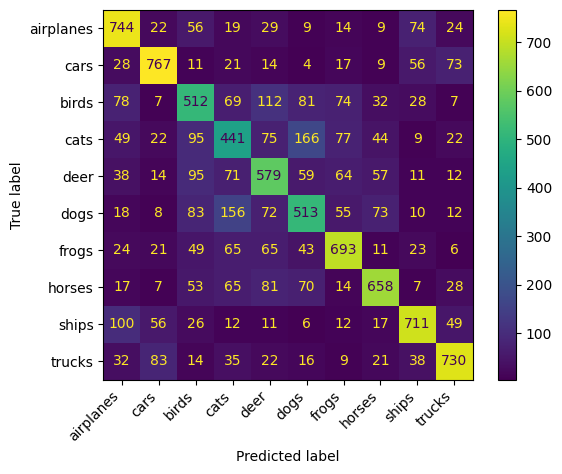

In [ ]:
color = 'white'
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

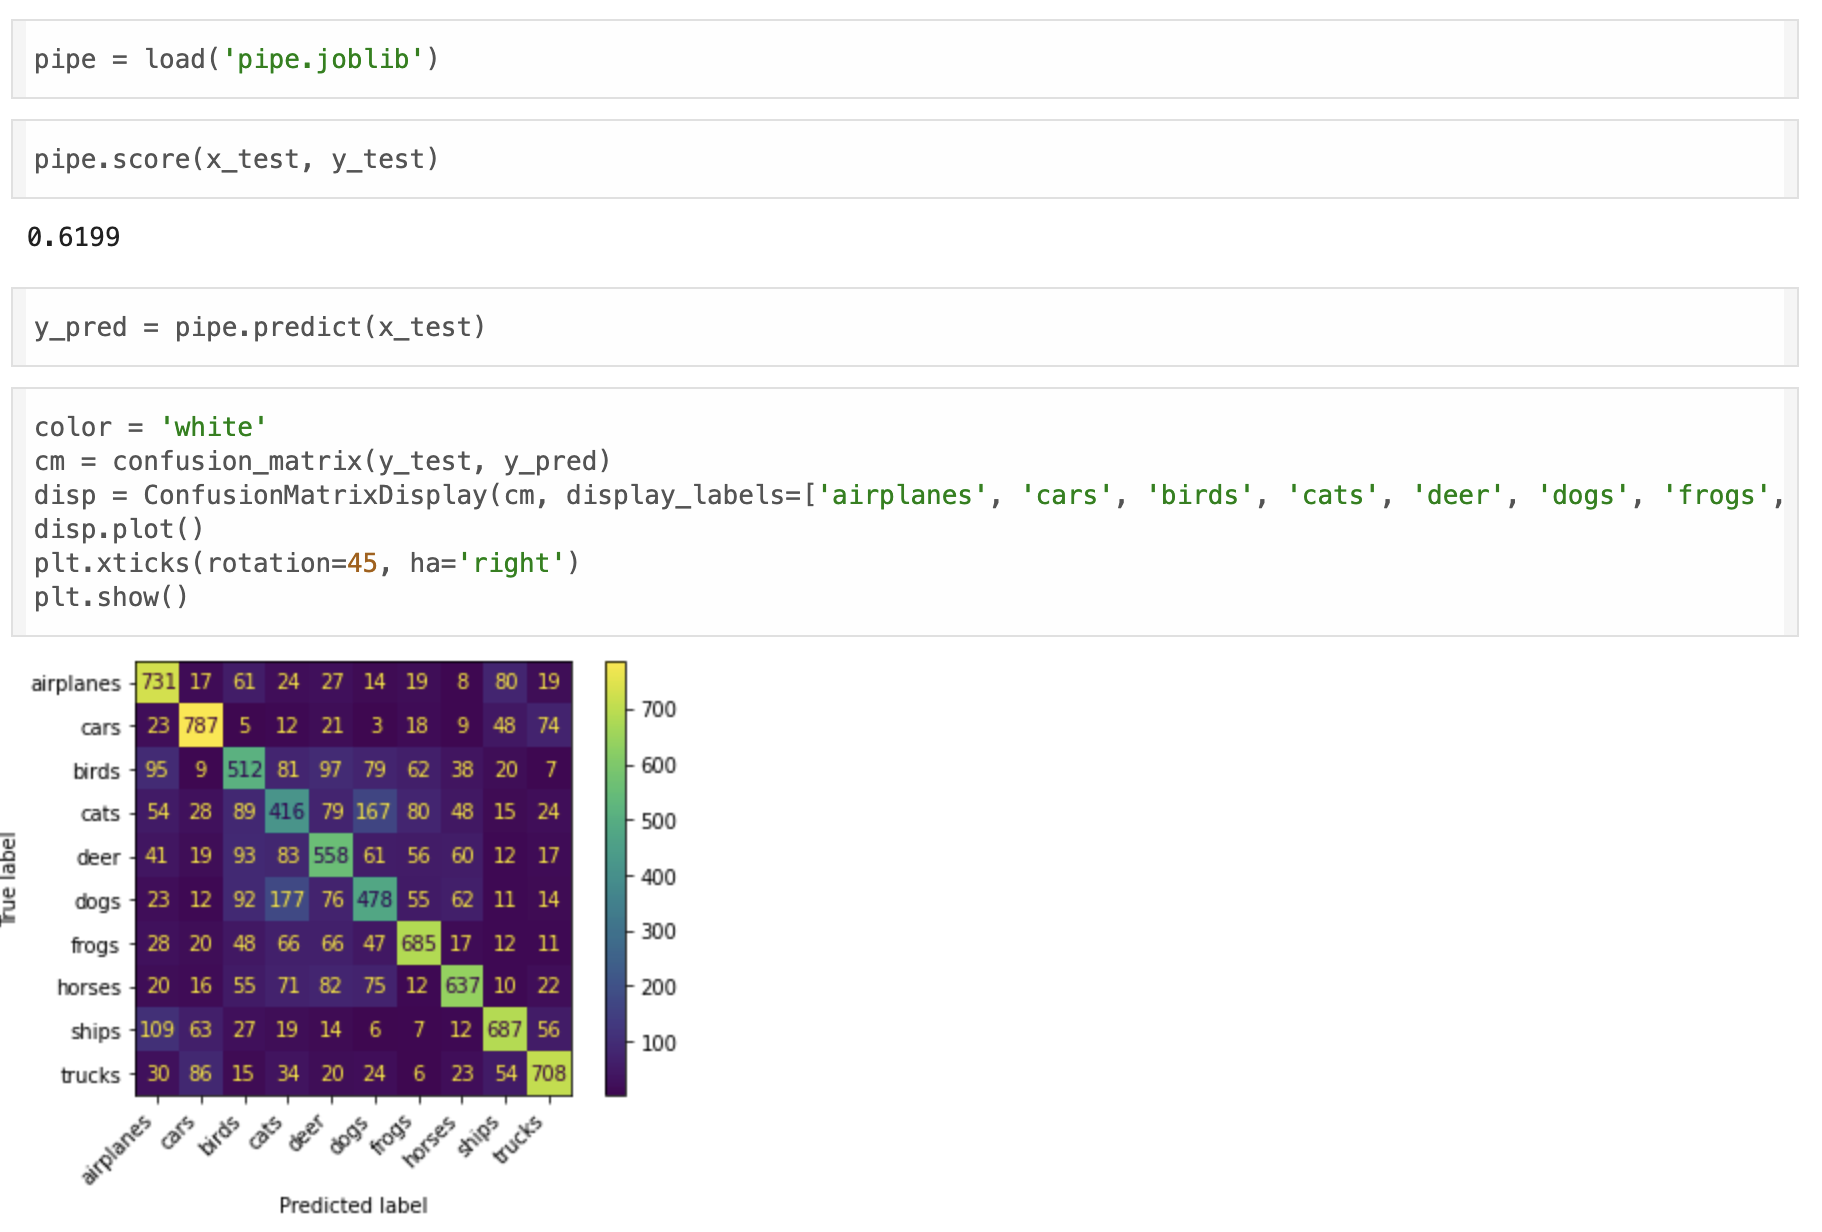